In [28]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

In [11]:
df = pd.read_excel('E:\\Papers\\Air Quality\\AirQualityUCI.xls')

In [3]:
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000  0.750239  
3  11.00  60.000000  0.786713  
4  11.15  59.575001  0.788794

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

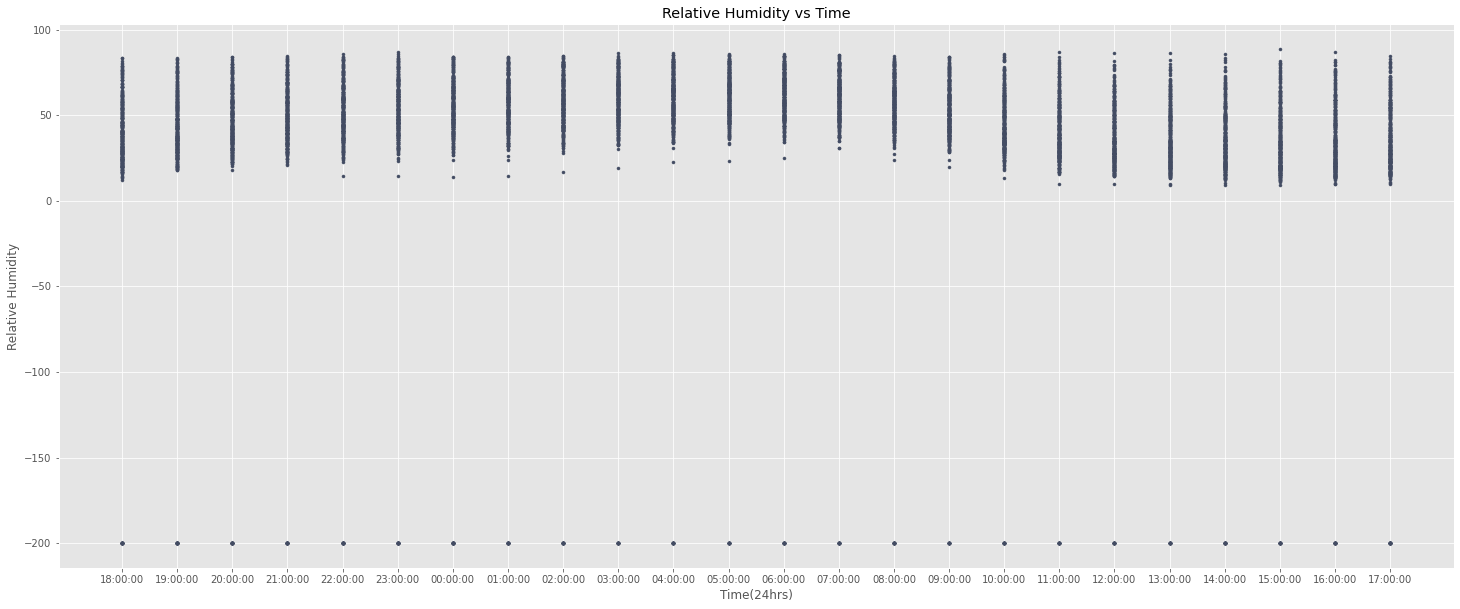

In [8]:
#RH vs Time
plt.figure(figsize=(25,10))
plt.xlabel('Time(24hrs)')
plt.ylabel('Relative Humidity')
plt.title("Relative Humidity vs Time")
plt.scatter(df.Time.astype(str), df['RH'], marker='.', aa=True, c = '#434c63')

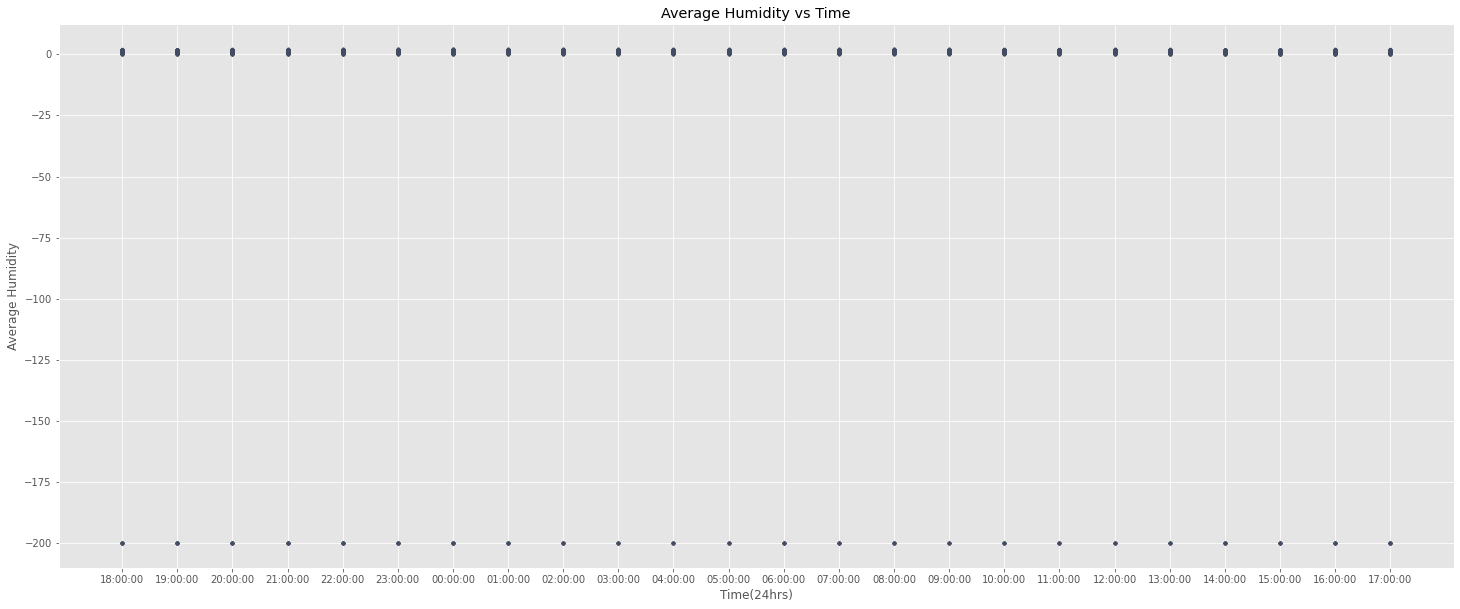

In [9]:
# AH Vs Time

plt.figure(figsize=(25,10))
plt.xlabel('Time(24hrs)')
plt.ylabel('Average Humidity')
plt.title("Average Humidity vs Time")
plt.scatter(df.Time.astype(str), df['AH'], marker='.', aa=True, c = '#434c63')

In [13]:
df['Time'] = pd.to_datetime(df.Date.astype(str)+' '+df.Time.astype(str))

In [15]:
df = df.drop(columns = ['NMHC(GT)', 'Date'])
time_vals = df['Time']

In [16]:
#-200 seems to indicate missing data
df.replace(to_replace= -200, value= np.NaN, inplace= True)

In [18]:
df['Time'] = time_vals

def VALUE_CORRECTION(col):
    df[col] = df.groupby('Time')[col].transform(lambda x:x.fillna(x.mean()))

#filing empty spaces with the mean
col_list = df.columns[1:12]

for i in col_list:
    VALUE_CORRECTION(i)

In [19]:
# from the above graphs we can infer that time or duration of the day does not play any significant role in determining AH or RH. Thus we drop that column from the dataframe
df.drop('Time', axis=1, inplace=True)

In [20]:
df.fillna(method='ffill', inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   C6H6(GT)       9357 non-null   float64
 3   PT08.S2(NMHC)  9357 non-null   float64
 4   NOx(GT)        9357 non-null   float64
 5   PT08.S3(NOx)   9357 non-null   float64
 6   NO2(GT)        9357 non-null   float64
 7   PT08.S4(NO2)   9357 non-null   float64
 8   PT08.S5(O3)    9357 non-null   float64
 9   T              9357 non-null   float64
 10  RH             9357 non-null   float64
 11  AH             9357 non-null   float64
dtypes: float64(12)
memory usage: 877.3 KB


In [21]:
# min max scaler for dataframe

features = df
autoscaler_df = MinMaxScaler()
features = autoscaler_df.fit_transform(features)

In [31]:
# min max scaler for RH and AH

rh_feat = df['RH'].values.reshape(-1, 1) #returns a numpy array
min_max_scaler_rh = MinMaxScaler()
rh_feat = min_max_scaler_rh.fit_transform(rh_feat)

ah_feat = df['AH'].values.reshape(-1, 1) #returns a numpy array
min_max_scaler_ah = MinMaxScaler()
ah_feat = min_max_scaler_ah.fit_transform(ah_feat)

In [22]:
# input and output feature vectors
X = np.delete(features, (-1, -2), 1)
Y = np.delete(features, (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), 1)

Y_rh = np.delete(Y, -1, 1)
Y_ah = np.delete(Y, -2, 1)

In [62]:
# Model for RH

# train test and validation split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y_rh, test_size=0.3)   # split train test
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)  # split train and validation
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(6549, 10) (1404, 10) (1404, 10) (6549, 1) (1404, 1) (1404, 1)


In [24]:
# developing the model

model = Sequential([Dense(32, activation='relu', input_shape=(10,)),    
                    Dense(64, activation='relu'), 
                    Dense(64, activation='relu'),
                    Dense(32, activation='relu'),                
                    Dense(1,),])  # neural networm having 1 input layer, 3 hidden layers, 1 output layer

model.compile(optimizer='adam',              
              loss='MeanSquaredError',              
              metrics=['accuracy'])

model.summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 8,737
Trainable params: 8,737
Non-trainable params: 0
_________________________________________________________________
None


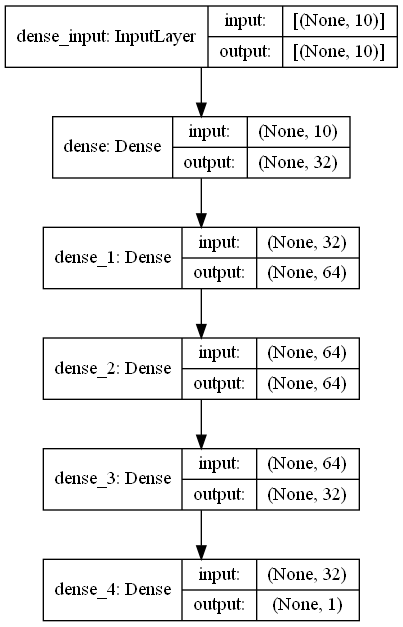

In [25]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [27]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
205/205 [==============================] - 2s 3ms/step - loss: 0.0601 - accuracy: 0.0000e+00 - val_loss: 0.0112 - val_accuracy: 7.1225e-04
Epoch 2/100
205/205 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 2.6711e-04 - val_loss: 0.0082 - val_accuracy: 7.1225e-04
Epoch 3/100
205/205 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 5.0284e-04 - val_loss: 0.0067 - val_accuracy: 7.1225e-04
Epoch 4/100
205/205 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 2.2261e-06 - val_loss: 0.0058 - val_accuracy: 7.1225e-04
Epoch 5/100
205/205 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 3.0584e-04 - val_loss: 0.0066 - val_accuracy: 7.1225e-04
Epoch 6/100
205/205 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 4.2064e-05 - val_loss: 0.0049 - val_accuracy: 7.1225e-04
Epoch 7/100
205/205 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 

In [63]:
predict_rh_Y_Test = model.predict(X_test)
error_rate_rh = mean_squared_error(Y_test, predict_rh_Y_Test)
error_rate_rh

0.0013438149082938306

In [38]:
predicted_rh_all = model.predict(X)
predicted_rh_all = min_max_scaler_rh.inverse_transform(predicted_rh_all)
df['RH_pred'] = predicted_rh_all

CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0        2.6      1360.00  11.881723        1045.50    166.0       1056.25   
1        2.0      1292.25   9.397165         954.75    103.0       1173.75   
2        2.2      1402.00   8.997817         939.25    131.0       1140.00   
3        2.2      1375.50   9.228796         948.25    172.0       1092.00   
4        1.6      1272.25   6.518224         835.50    131.0       1205.00   
...      ...          ...        ...            ...      ...           ...   
9352     3.1      1314.25  13.529605        1101.25    471.7        538.50   
9353     2.4      1162.50  11.355157        1027.00    353.3        603.75   
9354     2.4      1142.00  12.374538        1062.50    293.0        603.25   
9355     2.1      1002.50   9.547187         960.50    234.5        701.50   
9356     2.2      1070.75  11.932060        1047.25    265.2        654.00   

      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)       T         RH        AH  \
0       113.0       1692.00      1267.50  13.600  48.875001  0.757754   
1        92.0       1558.75       972.25  13.300  47.700000  0.725487   
2       114.0       1554.50      1074.00  11.900  53.975000  0.750239   
3       122.0       1583.75      1203.25  11.000  60.000000  0.786713   
4       116.0       1490.00      1110.00  11.150  59.575001  0.788794   
...       ...           ...          ...     ...        ...       ...   
9352    189.8       1374.25      1728.50  21.850  29.250000  0.756824   
9353    179.2       1263.50      1269.00  24.325  23.725000  0.711864   
9354    174.7       1240.75      1092.00  26.900  18.350000  0.640649   
9355    155.7       1041.00       769.75  28.325  13.550000  0.513866   
9356    167.7       1128.50       816.00  28.500  13.125000  0.502804   

        RH_pred  
0     50.386398  
1     46.206532  
2     54.924477  
3     61.392776  
4     61.537693  
...         ...  
9352  29.929174  
9353  23.814899  
9354  18.650171  
9355  12.604537  
9356  13.194805  

[9357 rows x 13 columns]

In [64]:
# model for AH

# train test and validation split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y_ah, test_size=0.3)   # split train test
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)  # split train and validation
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(6549, 10) (1404, 10) (1404, 10) (6549, 1) (1404, 1) (1404, 1)


In [51]:
# developing the model

model1 = Sequential([Dense(32, activation='relu', input_shape=(10,)),    
                    Dense(64, activation='relu'), 
                    Dense(64, activation='relu'),
                    Dense(32, activation='relu'),                
                    Dense(1,),])  # neural networm having 1 input layer, 3 hidden layers, 1 output layer

model1.compile(optimizer='adam',              
              loss='MeanSquaredError',              
              metrics=['accuracy'])

model1.summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 8,737
Trainable params: 8,737
Non-trainable params: 0
_________________________________________________________________
None


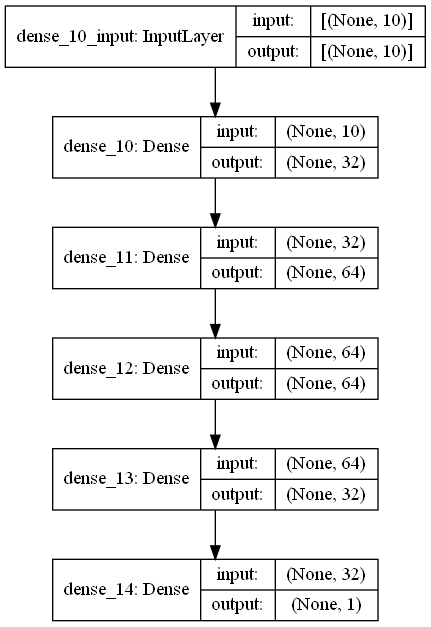

In [52]:
plot_model(model1, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [53]:
hist = model1.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
205/205 [==============================] - 1s 3ms/step - loss: 0.0722 - accuracy: 1.7189e-04 - val_loss: 0.0062 - val_accuracy: 7.1225e-04
Epoch 2/100
205/205 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 4.9005e-05 - val_loss: 0.0043 - val_accuracy: 7.1225e-04
Epoch 3/100
205/205 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 2.4342e-04 - val_loss: 0.0038 - val_accuracy: 7.1225e-04
Epoch 4/100
205/205 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 8.0465e-05 - val_loss: 0.0059 - val_accuracy: 7.1225e-04
Epoch 5/100
205/205 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 3.9280e-04 - val_loss: 0.0040 - val_accuracy: 7.1225e-04
Epoch 6/100
205/205 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 6.2806e-05 - val_loss: 0.0032 - val_accuracy: 7.1225e-04
Epoch 7/100
205/205 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 

In [66]:
predict_ah_Y_Test = model1.predict(X_test)
error_rate_ah = mean_squared_error(Y_test, predict_ah_Y_Test)
error_rate_ah

0.0009915144295462159

In [58]:
predicted_ah_all = model1.predict(X)
predicted_ah_all = min_max_scaler_ah.inverse_transform(predicted_ah_all)
df['AH_pred'] = predicted_ah_all

Text(0.05, 0.95, 'Mean Squared Error: 0.00134')

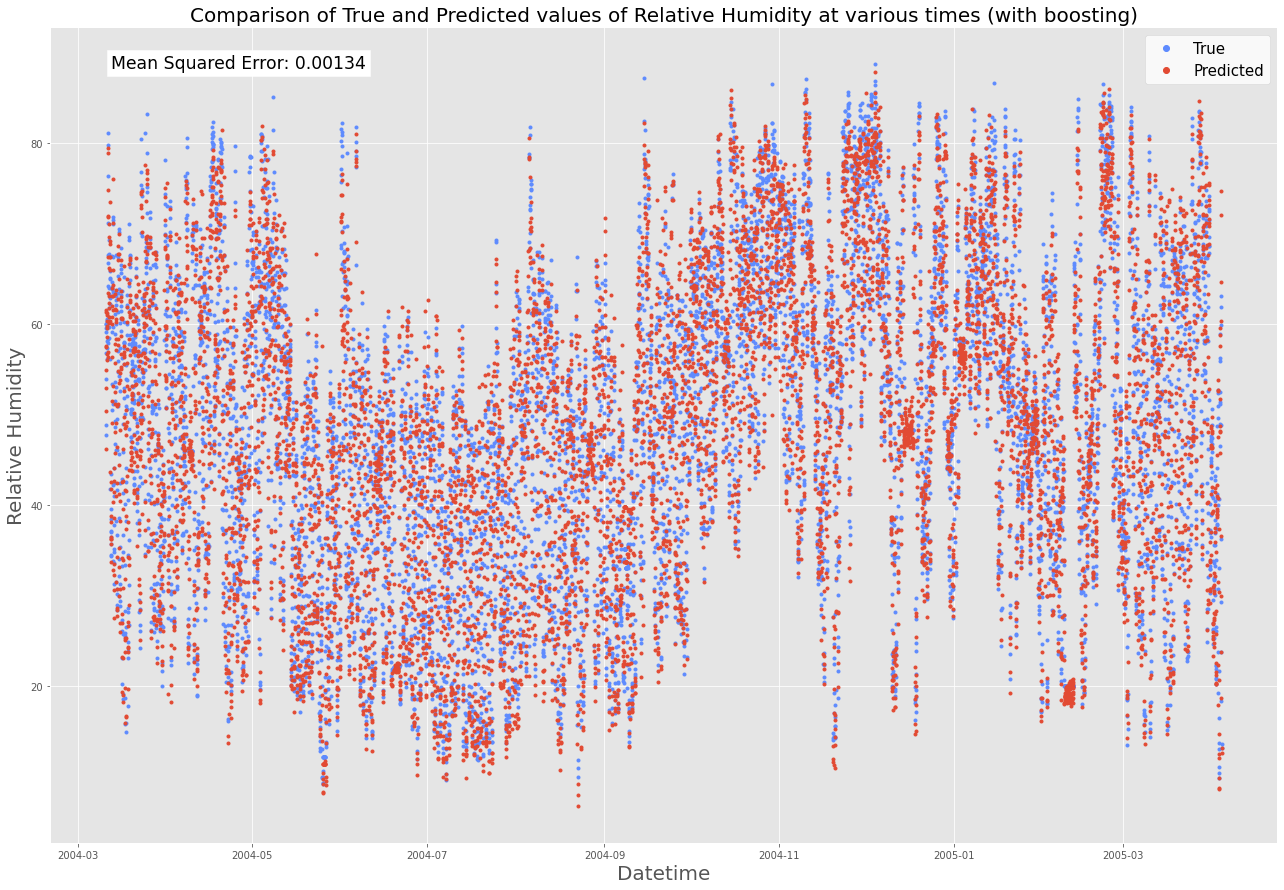

In [83]:
# visualising the results and finding difference scores
df['Time'] = time_vals

str_err0 = 'Mean Squared Error: ' + str('%.5f'%error_rate_rh)

plt.figure(figsize=(22,15))
plt.plot_date(df.Time, df.RH, marker='.', label="True", c = '#5e8bff')
plt.plot_date(df.Time, df.RH_pred, marker='.', label="Predicted")
plt.title("Comparison of True and Predicted values of Relative Humidity at various times (with NN)", fontsize=20)
plt.xlabel("Datetime", fontsize=20)
plt.ylabel("Relative Humidity", fontsize=20)
plt.legend(fontsize=15, facecolor='white', markerscale=2)
plt.annotate(str_err0, xy=(0.05, 0.95), xycoords='axes fraction', fontsize = 'xx-large', backgroundcolor = 'white')

Text(0.05, 0.95, 'Mean Squared Error: 0.00099')

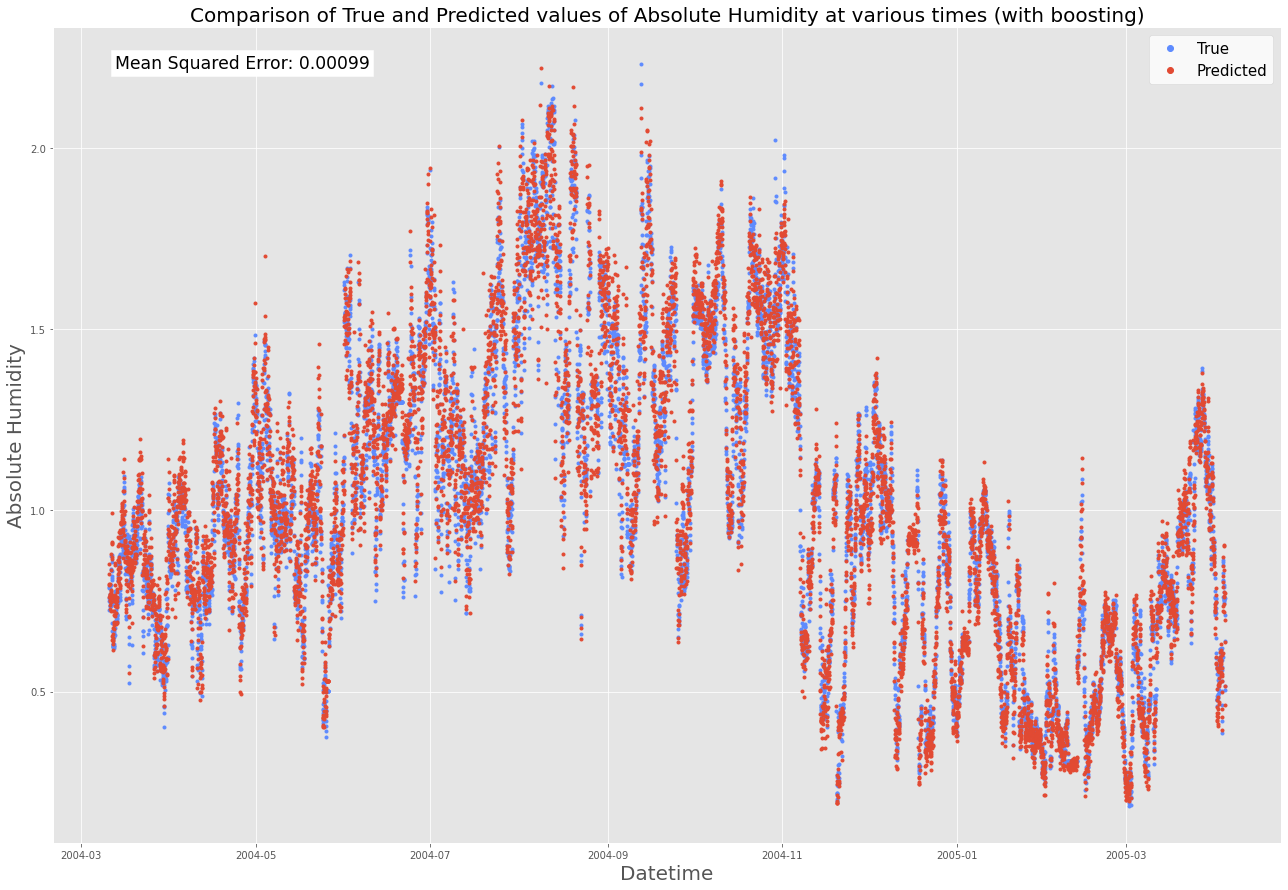

In [82]:
str_err = 'Mean Squared Error: ' + str('%.5f'%error_rate_ah)

plt.figure(figsize=(22,15))
plt.plot_date(df.Time, df.AH, marker='.', label="True", c = '#5e8bff')
plt.plot_date(df.Time, df.AH_pred, marker='.', label="Predicted")
plt.title("Comparison of True and Predicted values of Absolute Humidity at various times (with NN)", fontsize=20)
plt.xlabel("Datetime", fontsize=20)
plt.ylabel("Absolute Humidity", fontsize=20)
plt.legend(fontsize=15, facecolor='white', markerscale=2)
plt.annotate(str_err, xy=(0.05, 0.95), xycoords='axes fraction', fontsize = 'xx-large', backgroundcolor = 'white')

In [84]:
df.head()

CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0     2.6      1360.00  11.881723        1045.50    166.0       1056.25   
1     2.0      1292.25   9.397165         954.75    103.0       1173.75   
2     2.2      1402.00   8.997817         939.25    131.0       1140.00   
3     2.2      1375.50   9.228796         948.25    172.0       1092.00   
4     1.6      1272.25   6.518224         835.50    131.0       1205.00   

   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)      T         RH        AH    RH_pred  \
0    113.0       1692.00      1267.50  13.60  48.875001  0.757754  50.386398   
1     92.0       1558.75       972.25  13.30  47.700000  0.725487  46.206532   
2    114.0       1554.50      1074.00  11.90  53.975000  0.750239  54.924477   
3    122.0       1583.75      1203.25  11.00  60.000000  0.786713  61.392776   
4    116.0       1490.00      1110.00  11.15  59.575001  0.788794  61.537693   

    AH_pred                Time  
0  0.796488 2004-03-10 18:00:00  
1  0.760348 2004-03-10 19:00:00  
2  0.792981 2004-03-10 20:00:00  
3  0.825299 2004-03-10 21:00:00  
4  0.851624 2004-03-10 22:00:00

In [86]:
# save the results in a csv file

df.to_csv('NN_Implemented.csv')